# Kickstarter Case Study

## Name: Kathleen Trinh
## Date: 04/22/2022

## Package Imports and Set-Up

In [1]:
# Import Packages

# Data Handling
import copy
import pandas as pd

# Text Processing
import re
import string
from string import punctuation

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from spacy import displacy
import gensim
from gensim import corpora
import pyLDAvis.gensim_models

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

# Math Calculations
from numpy import absolute
from numpy import mean
from numpy import sqrt
from numpy import std
from scipy import stats

# Graphing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Kathleen\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\Kathleen\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Kathleen\anaco

In [2]:
# Ignore Deprecation and Future Warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Download nltk packages
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kathleen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kathleen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Change pandas settings to display all columns
pd.set_option("display.max_columns", None)

## Read Data from Input File

In [5]:
# Load the provided .csv file and put data in dataframe
df = pd.read_csv("Case Study SCAN Text  - Kickstarter data.csv", header=0)

# Print the first 3 elements of the dataframe
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,1/1/2016,6000,12/7/2015 18:21,100.0,failed,2,CA,74.84,70.89,4253.51
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,1/1/2016,2000,12/11/2015 10:52,2102.0,successful,48,BE,2314.01,2282.97,2172.19
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,1/1/2016,5000,11/9/2015 20:12,5630.0,successful,116,US,5630.00,5630.00,5000.00


## Exploratory Data Analysis

In [6]:
# Print the DataFrame's dimensions
print("DataFrame Dimensions: {} Rows, {} Columns".format(*df.shape))

DataFrame Dimensions: 110815 Rows, 15 Columns


In [7]:
df[['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']].describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
goal,64668.846582,1.419644e+06,1.00,2000.000,7000.00,20000.00,1.000000e+08
pledged,13714.275369,1.173463e+05,0.00,26.000,581.00,4724.50,1.277984e+07
backers,125.900636,9.180708e+02,0.00,2.000,11.00,60.00,1.549260e+05
usd pledged,4786.187460,6.030697e+04,0.00,0.000,116.00,1154.00,1.277984e+07
usd_pledged_real,11702.094549,1.043228e+05,0.00,25.955,550.00,4318.32,1.277984e+07
usd_goal_real,53888.200951,1.271062e+06,0.49,2000.000,6214.07,20000.00,1.073699e+08


In [8]:
# See number of unique values and top values for 'category', 'main_category', and 'state', including their frequencies
df[['category', 'main_category', 'state']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
category,159,Product Design,9161
main_category,15,Games,13884
state,6,failed,58155


In [9]:
# Make a copy of the original dataframe
df1 = df.copy()

# Convert 'deadline' and 'launched' value types to pandas datetime
df1['deadline'] = pd.to_datetime(df1['deadline'])
df1['launched'] = pd.to_datetime(df1['launched'])

# Calculate the duration of each Kickstarter in days
df1['campaign_duration_days'] = df1['deadline'] - df1['launched']
df1['campaign_duration_days'] = df1['campaign_duration_days'].dt.days.astype('int16')

# Print a sample of 3 elements from the dataframe
df1.sample(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
62772,1959962277,A Gem for A gem,Digital Art,Art,USD,2017-02-10,40,2017-01-11 04:34:00,16.0,failed,1,US,0.00,16.00,40.0,29
85779,1788993321,And Also With You,Horror,Film & Video,GBP,2017-07-10,1000,2017-06-10 21:23:00,1495.0,successful,22,GB,554.65,1939.62,1297.4,29
49870,278589134,Aston Abbey Brewing Company,Drinks,Food,USD,2016-11-08,25000,2016-09-24 00:24:00,5943.0,failed,66,US,2702.00,5943.00,25000.0,44


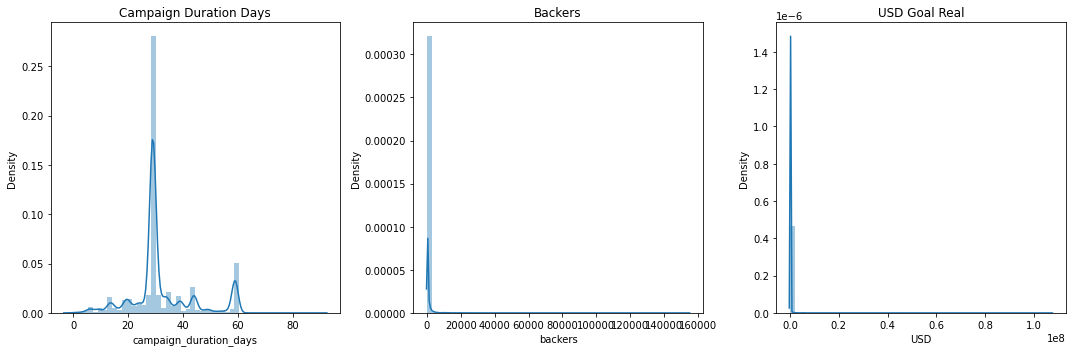

In [10]:
# Plot distributions for 'campaign_duration_days', 'backers', and 'usd_goal_real'

f, ax = plt.subplots(1, 3, figsize=(15,5), sharey=False)

sns.distplot(df1.campaign_duration_days, ax=ax[0])
ax[0].set_title("Campaign Duration Days")
ax[0].set_ylabel("Density")

sns.distplot(df1.backers, ax=ax[1])
ax[1].set_title("Backers")

sns.distplot(df1.usd_goal_real, ax=ax[2])
ax[2].set_title("USD Goal Real")
ax[2].set_xlabel("USD")

plt.tight_layout()
plt.show()

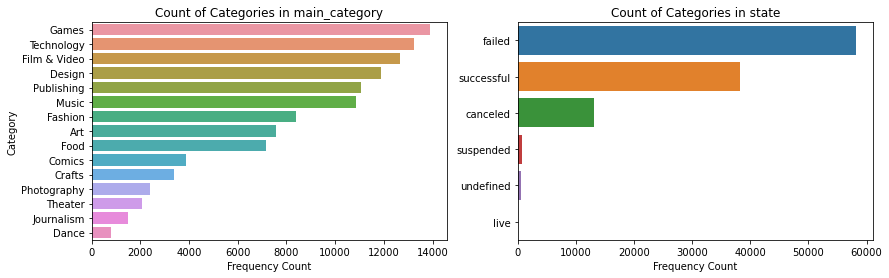

In [11]:
# Plot the best performing categories in 'main_category' and frequencies of each state

row_plots = ['main_category', 'state']
f, axes = plt.subplots(1, len(row_plots), figsize=(14,4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df1, order=df1[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")

axes[0].set_ylabel("Category")
axes[1].set_ylabel("")

plt.show()

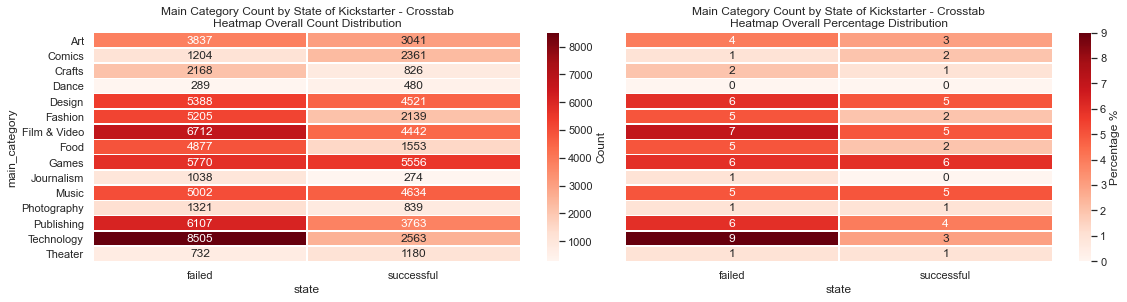

In [39]:
# Plot heatmaps of Percentage Pivot Table

f, ax = plt.subplots(1, 2, figsize=(16,4), sharey=True)
sns.heatmap(pd.crosstab(df1['main_category'], df1['state']),
           annot=True, linewidth=.5, ax=ax[0], fmt='g', cmap='Reds',
           cbar_kws={'label': 'Count'})
ax[0].set_title("Main Category Count by State of Kickstarter - Crosstab\nHeatmap Overall Count Distribution")

sns.heatmap(pd.crosstab(df1['main_category'], df1['state'], normalize=True).mul(100).round(0),
           annot=True, linewidths=.5, ax=ax[1], fmt='g', cmap='Reds',
           cbar_kws={'label': 'Percentage %'})
ax[1].set_title("Main Category Count by State of Kickstarter - Crosstab\nHeatmap Overall Percentage Distribution")
ax[1].set_ylabel("")

plt.tight_layout(pad=0)
plt.show()

### Look at 'failed' and 'successful' Kickstarters

In [13]:
# Only include rows where the value of 'state' is 'failed' or 'successful'
df1 = df1[df1['state'].isin(['failed', 'successful'])]

# View counts of 'failed' and 'successful' Kickstarters
print(df1['state'].value_counts())

# Print the DataFrame's dimensions
print("DataFrame Dimensions: {} Rows, {} Columns".format(*df1.shape))

failed        58155
successful    38172
Name: state, dtype: int64
DataFrame Dimensions: 96327 Rows, 16 Columns


In [14]:
# Create reference to subset of data where Kickstarter's 'state' is 'successful'
df_successful_kickstarters = df1.loc[(df['state'] == 'successful')]

# Create reference to subset of data where Kickstarter's 'state' is 'failed'
df_failed_kickstarters = df1.loc[(df['state'] == 'failed')]

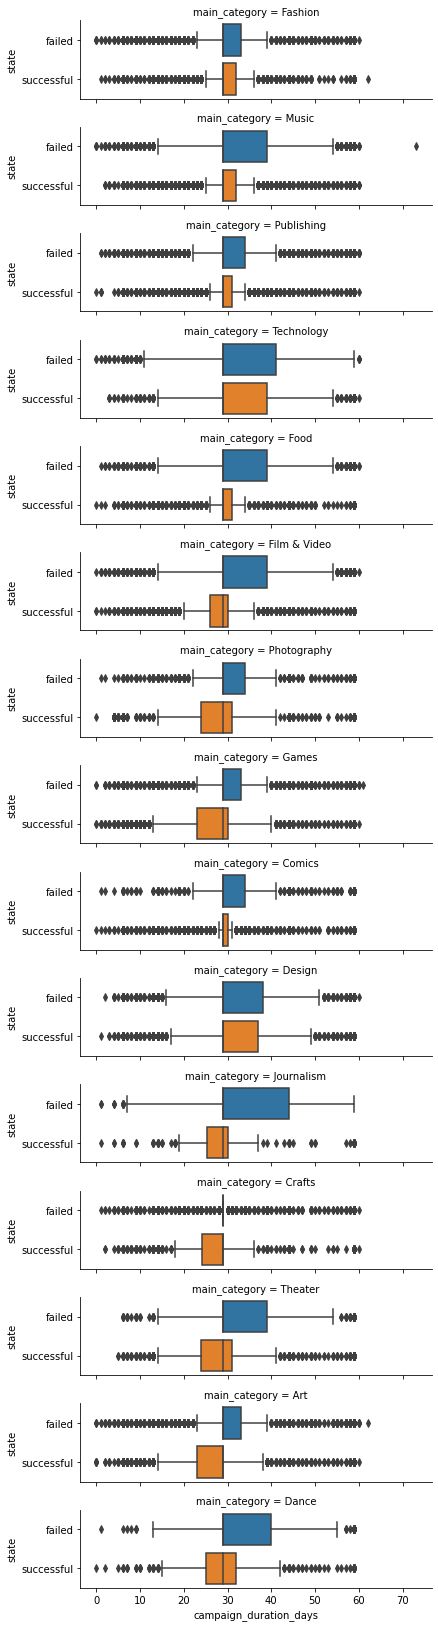

In [15]:
# Plot boxplots of 'campaign_duration_days' by 'main_category' of 'failed' and 'successful' Kickstarters
g = sns.catplot(x='campaign_duration_days', y='state', row='main_category',
               kind='box', orient='h', height=1.5, aspect=4,
               data=df1)

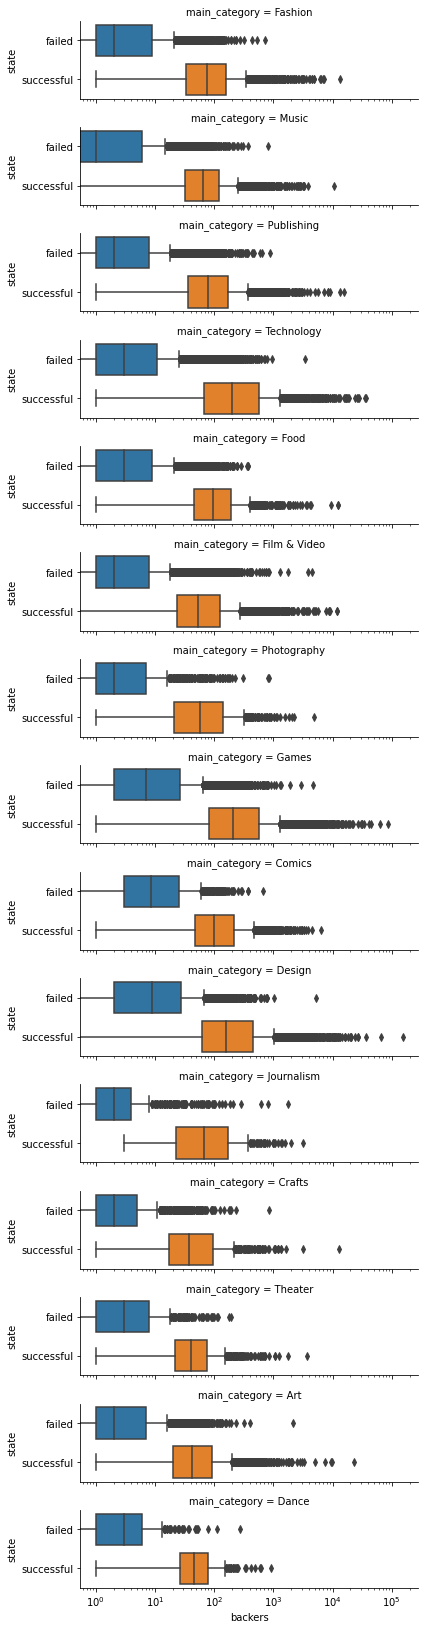

In [16]:
# Plot boxplots 'backers' by 'main_category' of 'failed' and 'successful' Kickstarters
g = sns.catplot(x='backers', y='state', row='main_category',
               kind='box', orient='h', height=1.5, aspect=4,
               data=df1)

# Use a log scale to better visualize data
g.set(xscale='log')

<AxesSubplot:xlabel='campaign_duration_days', ylabel='Density'>

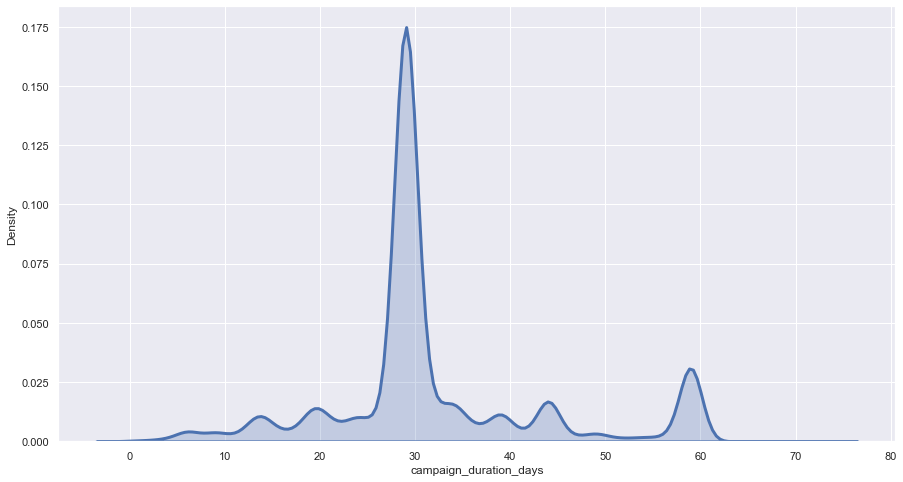

In [17]:
# Plot the distribution of 'campaign_duration_days'
sns.set(rc = {'figure.figsize': (15,8)})
sns.distplot(df1['campaign_duration_days'], hist=False, kde=True,
            kde_kws={'shade': True, 'linewidth': 3})

<AxesSubplot:xlabel='backers', ylabel='Density'>

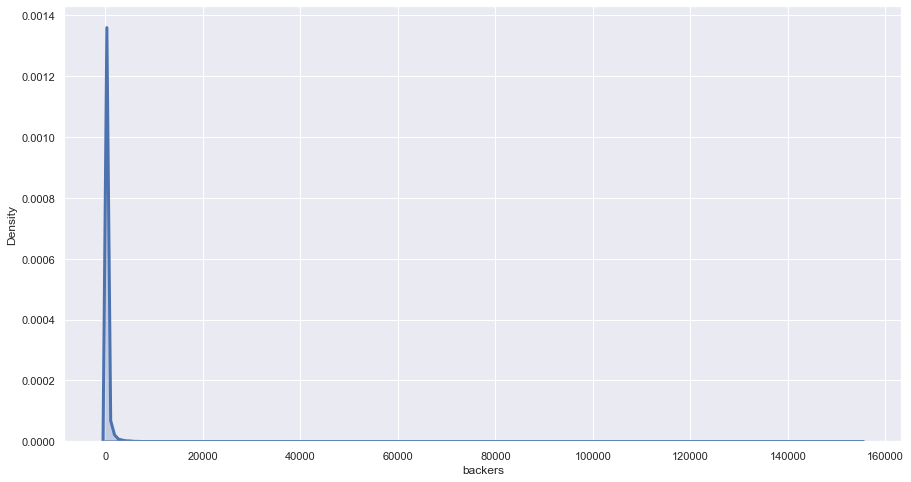

In [18]:
# Plot the distribution of 'backers' for 'successful' Kickstarters
sns.set(rc = {'figure.figsize': (15,8)})
sns.distplot(df_successful_kickstarters['backers'], hist=False, kde=True,
            kde_kws={'shade': True, 'linewidth': 3})

## One-Hot Encoding

### Prepare DataFrame with Feature Columns

In [94]:
# Make a copy of df1
df3 = df1.copy()

In [95]:
# Change 'failed' values to 0 and 'successful' values to 1

def convert_state(state: str) -> int:
    """Converts a 'failed' state to 0 and a 'successful' state to 1
    Args:
        state (str): A string representing the state of a Kickstarter with a value of 'failed' or 'successful'
    Returns:
        int: 0 or 1, representing a 'failed' or 'successful' state, respectively
    """
    try:
        if state == 'failed':
            return 0
        elif state == 'successful':
            return 1
        else:
            raise ValueError
    except ValueError as e:
        raise Exception("ValueError: Unsupported value for 'state':", state) from e

df3['state'] = df3['state'].map(convert_state)

In [96]:
# Functions to add new columns to the dataframe to represent flags for each unique value in a column

def create_cols_from_colname(df, column_name: str, index: int):
    """Adds columns to a dataframe object using the unique values in the column labeled with the provided column_name
       at the provided index and initializes all values to 0.
    Args:
        df (pandas.core.frame.DataFrame): The pandas dataframe to add the columns to
        column_name (str): The name of an existing column in the dataframe to make flag columns for
        index (int): The column index at which to insert the new columns
    """
    unique_values = df[column_name].unique()
    unique_values.sort()
    for c_name in reversed(unique_values):
        df.insert(index, c_name, 0)
    return

def flag_column(df, column_name: str):
    """Flags the corresponding flag column for the value in the specified column with column_name using the value 1.
    Args: df (pandas.core.frame.DataFrame): The pandas dataframe containing a column with column_name and columns for each
                                            unique value of column_name.
          column_name (str): The name of the column in the dataframe to check the value for in order to flag the
                             corresponding flag column with 1.
    """
    for i, row in df.iterrows():
        column_value = row[column_name]
        df.at[i, column_value] = 1
    return

In [97]:
# Create columns for each 'main_category' at column index 4 and initialize the values to 0
create_cols_from_colname(df3, 'main_category', 4)

# Indicate which 'main_category' a Kickstarter is associated with using 1 in corresponding column
flag_column(df3, 'main_category')

In [98]:
# Print a sample of 3 elements from the dataframe
df3.sample(3)

,ID,name,category,main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
18557,2090898244,iTworx,Apps,Technology,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,USD,2016-04-22,250000,2016-03-23 04:10:00,0.0,0,0,US,0.00,0.00,250000.00,29
44038,1505686408,Fruit Fly Funnel™ • The Reusable Trap • Bye By...,Gadgets,Technology,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CAD,2016-09-30,2000,2016-08-31 19:03:00,22292.0,1,1749,CA,191.97,16936.64,1519.53,29
71561,151883897,FLOAFERS: Foam Meets Fashion,Footwear,Fashion,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,USD,2017-04-08,30000,2017-02-07 06:20:00,137349.8,1,1768,US,28001.60,137349.80,30000.00,59


In [99]:
# Create columns for each 'currency' at column index 20 and initialize the values to 0
create_cols_from_colname(df3, 'currency', 20)

# Indicate which 'currency' a Kickstarter is associated with by using 1 in corresponding column
flag_column(df3, 'currency')

In [100]:
# Print a sample of 3 elements from the dataframe
df3.sample(3)

,ID,name,category,main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
24519,2039679228,"Samurai Slasher - part 2. Bigger, badder, and ...",Anthologies,Comics,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,GBP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-05-26,3500,2016-05-13 14:00:00,3630.0,1,142,GB,5241.26,5317.05,5126.63,12
97863,452631287,Recording and Publishing for New Album,Music,Music,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,USD,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-10-04,1000,2017-09-04 15:42:00,1062.0,1,12,US,103.00,1062.00,1000.00,29
109855,1585757857,Mujer en Venus,Fiction,Publishing,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,MXN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2017-12-24,50000,2017-10-25 06:59:00,0.0,0,0,MX,0.00,0.00,2534.34,59


In [101]:
# Create columns for each 'country' at column index 41 and initialize the values to 0
create_cols_from_colname(df3, 'country', 41)

# Indicate which 'country' a Kickstarter is associated with using 1 in corresponding column
flag_column(df3, 'country')

In [103]:
# Print a sample of 3 elements from the dataframe
df3.sample(3)

,ID,name,category,main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,deadline,goal,launched,pledged,state,backers,country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
21099,2049926062,Ankusha,Performances,Dance,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,GBP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2016-05-06,1250,2016-04-06 15:23:00,2151.0,1,37,GB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3067.67,3117.26,1811.52,29
92120,229030107,Mindset Press: Conquering Your Thoughts With C...,Nonfiction,Publishing,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,USD,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-08-24,1200,2017-07-25 00:43:00,35.0,0,2,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.00,35.00,1200.00,29
87713,825763155,The mountain with teeth: Historias de piedra,Webcomics,Comics,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,MXN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2017-07-23,100000,2017-06-08 17:03:00,474570.0,1,893,MX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9877.05,26749.90,5636.66,44


In [104]:
# Functions for binning and making columns for numeric features 

def make_bins(upper_end: int, step: int) -> list:
    bin_markers = [i for i in range(0, upper_end, step)]
    bin_list = []
    i = 0
    while i < len(bin_markers) - 1:
        bin_list.append((bin_markers[i], bin_markers[i + 1]))
        i += 1
    return bin_list

def make_bin_column_name(column_name: str, bin_range: tuple) -> str:
    bin_column_name = column_name + str(bin_range)
    bin_column_name = bin_column_name.replace("(", "_")
    bin_column_name = bin_column_name.replace(", ", "_")
    bin_column_name = bin_column_name.strip(")")
    return bin_column_name

def create_cols_from_bins(df, column_name: str, bins: list, index: int):
    """Adds columns to a dataframe object using the provided list of bins at the provided index and initializes all values to 0.
    Args:
        df (pandas.core.frame.DataFrame): The pandas dataframe to add the columns to
        column_name (str): The name of the column in the dataframe to make bins for
        bins (list): The list of tuples containing the range values for the bins to make flag columns for
        index (int): The column index at which to insert the new columns
    """
    for bin_range in reversed(bins):
        bin_name = make_bin_column_name(column_name, bin_range)
        df.insert(index, bin_name, 0)
    return

def flag_bin_column(df, column_name: str, bins:list):
    """Flags the corresponding flag column for the bin the value in the specified column with column_name falls into using the value 1.
    Args: df (pandas.core.frame.DataFrame): The pandas dataframe containing a column with column_name and columns for each
                                            unique value of column_name.
          column_name (str): The name of the column in the dataframe to check the value for in order to flag the
                             corresponding flag bin column with 1.
          bins (list): The list of tuples containing the range values for the bins in the dataframe
    """
    for i, row in df.iterrows():
        column_value = row[column_name]
        for bin_range in bins:
            if column_value in range(bin_range[0], bin_range[1]):
                bin_name = make_bin_column_name(column_name, bin_range)
                df.at[i, bin_name] = 1
                break
    return

In [105]:
# Define bins for 'backers'
bins_backers = make_bins(180000, 20000)

# Create columns for each bin for the number of 'backers' at column index 40 and initialize the values to 0
create_cols_from_bins(df3, 'backers', bins_backers, 40)

# Indicate which bin column a Kickstarter's number of 'backers' falls into using 1 in corresponding column
flag_bin_column(df3, 'backers', bins_backers)

In [106]:
# Print a sample of 3 elements from the dataframe
df3.sample(3)

,ID,name,category,main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,deadline,goal,launched,pledged,state,backers,backers_0_20000,backers_20000_40000,backers_40000_60000,backers_60000_80000,backers_80000_100000,backers_100000_120000,backers_120000_140000,backers_140000_160000,country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
103004,397358830,HealthVisor: Small Steps to Lasting Change,Apps,Technology,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,USD,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-11-09,50000,2017-10-10 14:21:00,5.0,0,1,1,0,0,0,0,0,0,0,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,5.0,50000.0,29
80670,1075499971,Loop Troupe Web-Series,Comedy,Film & Video,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,USD,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-06-07,3500,2017-05-07 21:47:00,4185.0,1,51,1,0,0,0,0,0,0,0,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10.0,4185.0,3500.0,30
109632,208495165,Daddy Bag - Thinnest and First Minimalist Diap...,Product Design,Design,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,USD,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-12-22,5000,2017-10-23 16:01:00,6113.0,1,74,1,0,0,0,0,0,0,0,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2738.0,6113.0,5000.0,59


In [107]:
# Define bins for 'campaign_duration_days'
bins_campaign_duration_days = [(0, 30), (30, df3.campaign_duration_days.max() + 1)]

# Create columns for each bin for the number of 'backers' at column index 76 and initialize the values to 0
create_cols_from_bins(df3, 'campaign_duration_days', bins_campaign_duration_days, 76)

# Indicate which bin column a Kickstarter's duration (in number of days) falls into using 1 in corresponding column
flag_bin_column(df3, 'campaign_duration_days', bins_campaign_duration_days)

In [109]:
# Print a sample of 3 elements from the dataframe
df3.sample(3)

,ID,name,category,main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,deadline,goal,launched,pledged,state,backers,backers_0_20000,backers_20000_40000,backers_40000_60000,backers_60000_80000,backers_80000_100000,backers_100000_120000,backers_120000_140000,backers_140000_160000,country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days,campaign_duration_days_0_30,campaign_duration_days_30_74
866,85434950,90 Days Abroad: Uncovering the real Japan,Documentary,Film & Video,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,USD,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-01-05,5000,2015-12-06 20:18:00,0.0,0,0,1,0,0,0,0,0,0,0,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.00,0.00,5000.00,29,1,0
11338,1218080895,Coda's Link- The Author of Darkness,Fiction,Publishing,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,USD,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-03-14,1600,2016-02-13 15:54:00,1.0,0,1,1,0,0,0,0,0,0,0,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.00,1.00,1600.00,29,1,0
42796,1041383721,Faith and Rainbows,Young Adult,Publishing,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,CAD,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2016-09-21,500,2016-07-23 08:39:00,48.2,0,5,1,0,0,0,0,0,0,0,CA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.27,36.96,383.38,59,0,1


In [201]:
# Export the dataframe with features
df3.to_csv("Kickstarter_data_df3.csv", index=None, header=True, encoding='utf-8')

### Baseline Models

In [110]:
# Shuffle dataframe
df3 = df3.sample(frac=1)

# Export the shuffled dataframe with features
df3.to_csv("Kickstarter_data_df3_shuffled.csv", index=None, header=True, encoding='utf-8')

In [112]:
# Divide the dataset into the training set and test set using a 80/20 split
train, test = train_test_split(df3, test_size=0.2)

# Print the dimensions of the training set
print("Training Set DataFrame Dimensions: {} Rows, {} Columns".format(*train.shape))

# Print the dimensions of the test set
print("Test Set DataFrame Dimensions: {} Rows, {} Columns".format(*test.shape))

# Export the training and test sets
train.to_csv("Kickstarter_data_df3_train.csv", index=None, header=True, encoding='utf-8')
test.to_csv("Kickstarter_data_df3_test.csv", index=None, header=True, encoding='utf-8')

Training Set DataFrame Dimensions: 77061 Rows, 78 Columns
Test Set DataFrame Dimensions: 19266 Rows, 78 Columns


In [119]:
# Create list of column names that are features to be used in the model
df3_column_names = df3.columns.tolist()
features_list_b = df3_column_names[4:19] + df3_column_names[20:34] + df3_column_names[40:48] + df3_column_names[49:72] + df3_column_names[76:]

print("{} Features / Columns:".format(len(features_list_b)))
for i, col_name in enumerate(features_list_b):
    print("\t{}. {}".format(i, col_name))

62 Features / Columns:
	0. Art
	1. Comics
	2. Crafts
	3. Dance
	4. Design
	5. Fashion
	6. Film & Video
	7. Food
	8. Games
	9. Journalism
	10. Music
	11. Photography
	12. Publishing
	13. Technology
	14. Theater
	15. AUD
	16. CAD
	17. CHF
	18. DKK
	19. EUR
	20. GBP
	21. HKD
	22. JPY
	23. MXN
	24. NOK
	25. NZD
	26. SEK
	27. SGD
	28. USD
	29. backers_0_20000
	30. backers_20000_40000
	31. backers_40000_60000
	32. backers_60000_80000
	33. backers_80000_100000
	34. backers_100000_120000
	35. backers_120000_140000
	36. backers_140000_160000
	37. AT
	38. AU
	39. BE
	40. CA
	41. CH
	42. DE
	43. DK
	44. ES
	45. FR
	46. GB
	47. HK
	48. IE
	49. IT
	50. JP
	51. LU
	52. MX
	53. N,0"
	54. NL
	55. NO
	56. NZ
	57. SE
	58. SG
	59. US
	60. campaign_duration_days_0_30
	61. campaign_duration_days_30_74


In [122]:
# Divide the training and test sets into their respective feature inputs and outputs
X_train_b = train[features_list_b]
y_train_b = train[['state']]
X_test_b = test[features_list_b]
y_test_b = test[['state']]

In [124]:
# Export the divided training and test sets
X_train_b.to_csv("Kickstarter_data_X_train_b.csv", index=None, header=True, encoding='utf-8')
y_train_b.to_csv("Kickstarter_data_y_train_b.csv", index=None, header=True, encoding='utf-8')
X_test_b.to_csv("Kickstarter_data_X_test_b.csv", index=None, header=True, encoding='utf-8')
y_test_b.to_csv("Kickstarter_data_y_test_b.csv", index=None, header=True, encoding='utf-8')

### Baseline Logistic Regression

In [125]:
# Create Logistic Regression model using the training set
logistic_regression_b = LogisticRegression(max_iter=1000).fit(X_train_b, y_train_b.values.ravel())

In [127]:
print("Training Set Accuracy: {}".format(metrics.accuracy_score(logistic_regression_b.predict(X_train_b), y_train_b)))
print("Test Set Accuracy: {}".format(metrics.accuracy_score(logistic_regression_b.predict(X_test_b), y_test_b)))

Training Set Accuracy: 0.6290341417837817
Test Set Accuracy: 0.63064465898474


In [128]:
print(metrics.classification_report(logistic_regression_b.predict(X_test_b), y_test_b))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74     16122
           1       0.24      0.57      0.34      3144

    accuracy                           0.63     19266
   macro avg       0.56      0.61      0.54     19266
weighted avg       0.78      0.63      0.68     19266



In [130]:
# Run model on test set and get prediction values
y_pred_logistic_regression_b = logistic_regression_b.predict(X_test_b)

In [131]:
# Export the model's predictions on the test set
pd.DataFrame(y_pred_logistic_regression_b).to_csv("Kickstarter_data_y_pred_logistic_regression_b.csv", index=None, header=True, encoding='utf-8')

#### Cross Validation on Baseline Logistic Regression

In [132]:
# Specify the K-Fold Cross Validation to be used with k = 5
cv = KFold(n_splits=5, random_state=None, shuffle=False)

# Use K-Fold Cross Validation on the Logistic Regression model
scores_logistic_regression_b = cross_val_score(logistic_regression_b, X_train_b, y_train_b, scoring='accuracy', cv=cv, n_jobs=-1)

In [133]:
# View accuracy score for each fold
for i, score in enumerate(scores_logistic_regression_b, 1):
    print("Fold {} Accuracy: {}".format(i, score))
    
print("Cross Validation Accuracy: ", mean(scores_logistic_regression_b), "+/-", std(scores_logistic_regression_b))

Fold 1 Accuracy: 0.627911503276455
Fold 2 Accuracy: 0.6263301323643914
Fold 3 Accuracy: 0.631650661821957
Fold 4 Accuracy: 0.6175058396055022
Fold 5 Accuracy: 0.6331430054502984
Cross Validation Accuracy:  0.6273082285037208 +/- 0.005482860380508501


#### Confusion Matrix & ROC Curve for Baseline Logistic Regression

In [137]:
# Create confusion matrix using true labels and model's predicted labels
cm_logistic_regression_b = confusion_matrix(y_test_b, y_pred_logistic_regression_b)

print("True Negatives:", cm_logistic_regression_b[0][0])
print("False Positives:", cm_logistic_regression_b[0][1])
print("False Negatives:", cm_logistic_regression_b[1][0])
print("True Positives:", cm_logistic_regression_b[1][1])

True Negatives: 10346
False Positives: 1340
False Negatives: 5776
True Positives: 1804


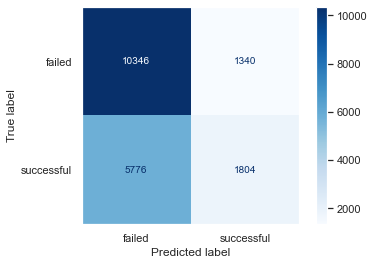

In [138]:
# Plot confusion matrix
cmd_logistic_regression_b = ConfusionMatrixDisplay(cm_logistic_regression_b, display_labels=['failed', 'successful'])
cmd_logistic_regression_b.plot(cmap="Blues", values_format='d')
plt.grid(False)
plt.show()

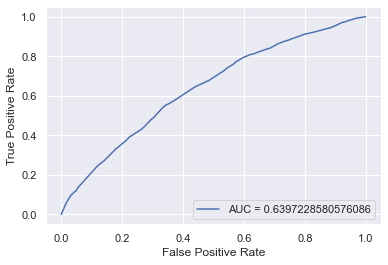

In [139]:
# Define metrics
y_pred_proba_logistic_regression_b = logistic_regression_b.predict_proba(X_test_b)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_b, y_pred_proba_logistic_regression_b)
auc_logistic_regression_b = metrics.roc_auc_score(y_test_b, y_pred_proba_logistic_regression_b)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = " + str(auc_logistic_regression_b))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

### Baseline Random Forest

In [140]:
# Create Random Forest model using the training set
random_forest_b = RandomForestClassifier().fit(X_train_b, y_train_b.values.ravel())

In [141]:
print("Training Set Accuracy: {}".format(metrics.accuracy_score(random_forest_b.predict(X_train_b), y_train_b)))
print("Test Set Accuracy: {}".format(metrics.accuracy_score(random_forest_b.predict(X_test_b), y_test_b)))

Training Set Accuracy: 0.6357690660645463
Test Set Accuracy: 0.6295546558704453


In [142]:
print(metrics.classification_report(random_forest_b.predict(X_test_b), y_test_b))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74     15273
           1       0.29      0.56      0.38      3993

    accuracy                           0.63     19266
   macro avg       0.57      0.60      0.56     19266
weighted avg       0.73      0.63      0.66     19266



In [143]:
# Run model on test set and get prediction values
y_pred_random_forest_b = random_forest_b.predict(X_test_b)

In [144]:
# Export the model's predictions on the test set
pd.DataFrame(y_pred_random_forest_b).to_csv("Kickstarter_data_y_pred_random_forest_b.csv", index=None, header=True, encoding='utf-8')

#### Cross Validation on Baseline Random Forest

In [145]:
# Specify the K-Fold Cross Validation to be used with k = 5
cv = KFold(n_splits=5, random_state=None, shuffle=False)

# Use K-Fold Cross Validation on the Random Forest model
scores_random_forest_b = cross_val_score(random_forest_b, X_train_b, y_train_b, scoring='accuracy', cv=cv, n_jobs=-1)

In [146]:
# View accuracy score for each fold
for i, score in enumerate(scores_random_forest_b, 1):
    print("Fold {} Accuracy: {}".format(i, score))
    
print("Cross Validation Accuracy: ", mean(scores_random_forest_b), "+/-", std(scores_random_forest_b))

Fold 1 Accuracy: 0.6309608771816
Fold 2 Accuracy: 0.6264599013755515
Fold 3 Accuracy: 0.6317804308331171
Fold 4 Accuracy: 0.6236049831300285
Fold 5 Accuracy: 0.6321048533610174
Cross Validation Accuracy:  0.6289822091762629 +/- 0.0033696490860219896


#### Confusion Matrix & ROC Curve for Baseline Random Forest

In [147]:
# Create confusion matrix using true labels and model's predicted labels
cm_random_forest_b = confusion_matrix(y_test_b, y_pred_random_forest_b)

print("True Negatives:", cm_random_forest_b[0][0])
print("False Positives:", cm_random_forest_b[0][1])
print("False Negatives:", cm_random_forest_b[1][0])
print("True Positives:", cm_random_forest_b[1][1])

True Negatives: 9911
False Positives: 1775
False Negatives: 5362
True Positives: 2218


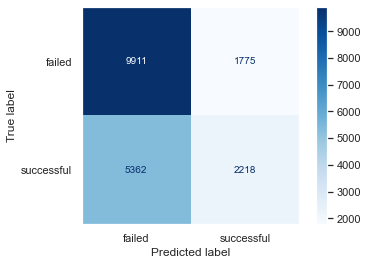

In [148]:
# Plot confusion matrix
cmd_random_forest_b = ConfusionMatrixDisplay(cm_random_forest_b, display_labels=['failed', 'successful'])
cmd_random_forest_b.plot(cmap="Blues", values_format='d')
plt.grid(False)
plt.show()

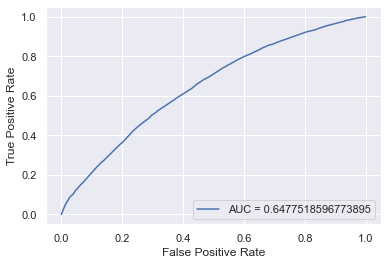

In [150]:
# Define metrics
y_pred_proba_random_forest_b = random_forest_b.predict_proba(X_test_b)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_b, y_pred_proba_random_forest_b)
auc_random_forest_b = metrics.roc_auc_score(y_test_b, y_pred_proba_random_forest_b)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = " + str(auc_random_forest_b))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

## Exploratory Data Analysis (continued)

In [21]:
# Make a copy of df1
df4 = df1.copy()

In [36]:
# Create reference to subset where 'main_category' is 'Games'
games_subset = df4.loc[(df['main_category'] == 'Games')]

# Only look at the following columns for the Technology subset
games_subset = games_subset[['state', 'backers', 'usd_pledged_real', 'usd_goal_real', 'campaign_duration_days']]

# Create reference to subset where 'main_category' is 'Fashion'
fashion_subset = df4.loc[(df['main_category'] == 'Fashion')]

# Only look at the following columns for the Technology subset
fashion_subset = fashion_subset[['state', 'backers', 'usd_pledged_real', 'usd_goal_real', 'campaign_duration_days']]

# Create reference to subset where 'main_category' is 'Technology'
technology_subset = df4.loc[(df['main_category'] == 'Technology')]

# Only look at the following columns for the Technology subset
technology_subset = technology_subset[['state', 'backers', 'usd_pledged_real', 'usd_goal_real', 'campaign_duration_days']]

# Variable to hold subset data for plotting
kickstarter_subset = technology_subset

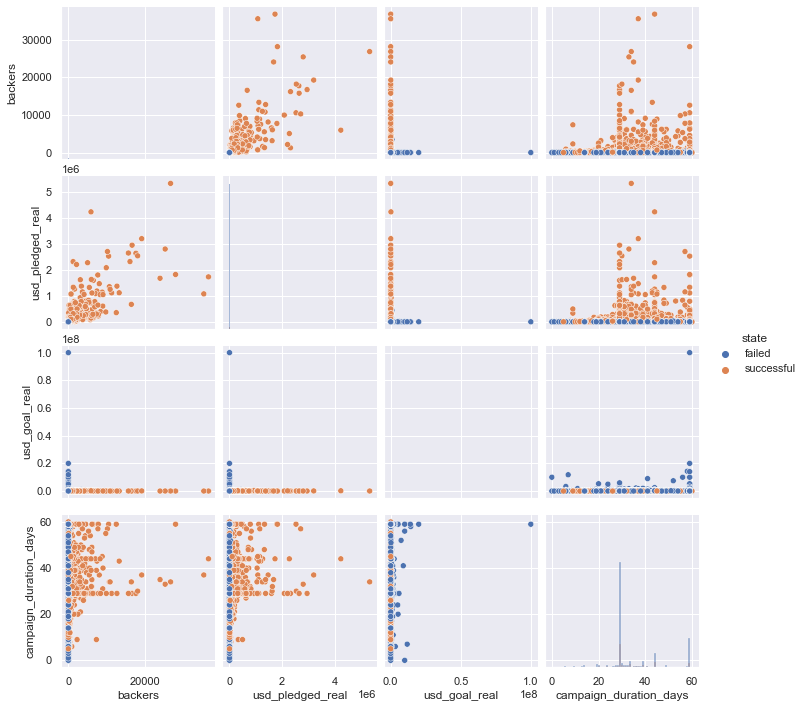

In [24]:
# Plot pairwise relationships
sns.pairplot(kickstarter_subset, hue='state', diag_kind='hist')

In [25]:
# Calculate Pearson Correlation Coefficient and p-value between 'backers' and 'campaign_duration_days'
stats.pearsonr(kickstarter_subset['backers'], kickstarter_subset['campaign_duration_days'])

(0.03489162026182735, 0.00024116798094624215)

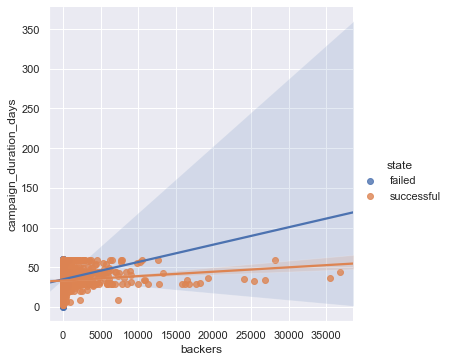

In [26]:
# Plot Pearson Correlation
sns.lmplot(x='backers', y='campaign_duration_days', hue='state', data=kickstarter_subset, truncate=False)

In [27]:
# Calculate Pearson Correlation Coefficient and p-value between p-value between 'backers' and 'usd_goal_real'
stats.pearsonr(kickstarter_subset['backers'], kickstarter_subset['usd_goal_real'])

(-0.005051657149073748, 0.5951411044640064)

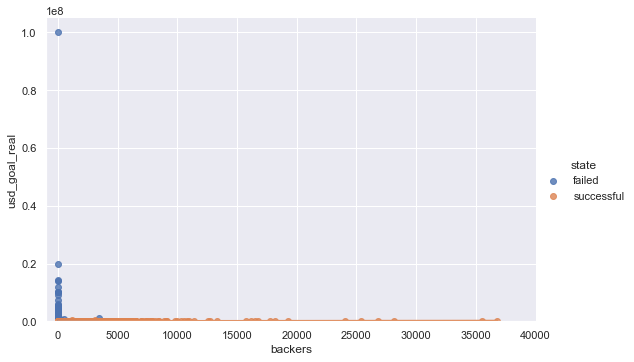

In [28]:
# Plot Pearson Correlation
g = sns.lmplot(x='backers', y='usd_goal_real', hue='state', data=kickstarter_subset, height=5, aspect=1.5)
g.set(xlim=(-1000, 40000))
g.set(ylim=(0, None))

In [29]:
# Calculate Pearson Correlation Coefficient and p-value between 'backers' and 'usd_pledged_real'
stats.pearsonr(kickstarter_subset['backers'], kickstarter_subset['usd_pledged_real'])

(0.7757848580660223, 0.0)

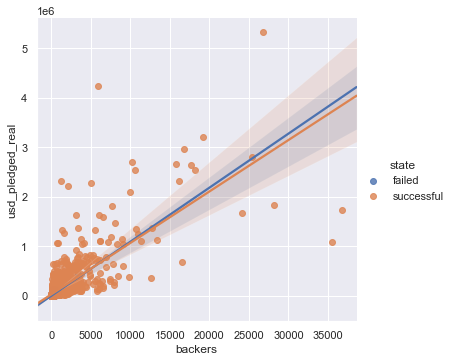

In [30]:
# Plot Pearson Correlation
sns.lmplot(x='backers', y='usd_pledged_real', hue='state', data=kickstarter_subset, truncate=False)

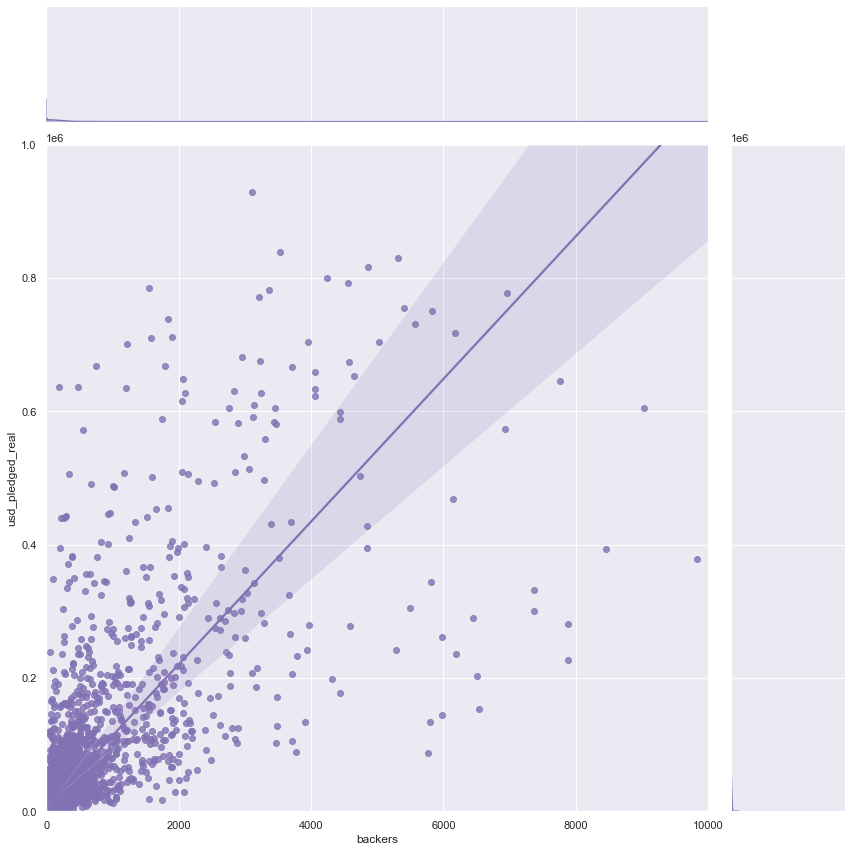

In [31]:
g = sns.jointplot(x='backers', y='usd_pledged_real', data=kickstarter_subset,
                 kind='reg', truncate=False,
                 xlim=(0, 10000), ylim=(0, 1000000),
                 color='m', height=12)

In [32]:
# Calculate pairwise correlation
cormat = kickstarter_subset.corr()
round(cormat, 2)

,backers,usd_pledged_real,usd_goal_real,campaign_duration_days
backers,1.00,0.78,-0.01,0.03
usd_pledged_real,0.78,1.00,-0.00,0.03
usd_goal_real,-0.01,-0.00,1.00,0.04
campaign_duration_days,0.03,0.03,0.04,1.00


<AxesSubplot:>

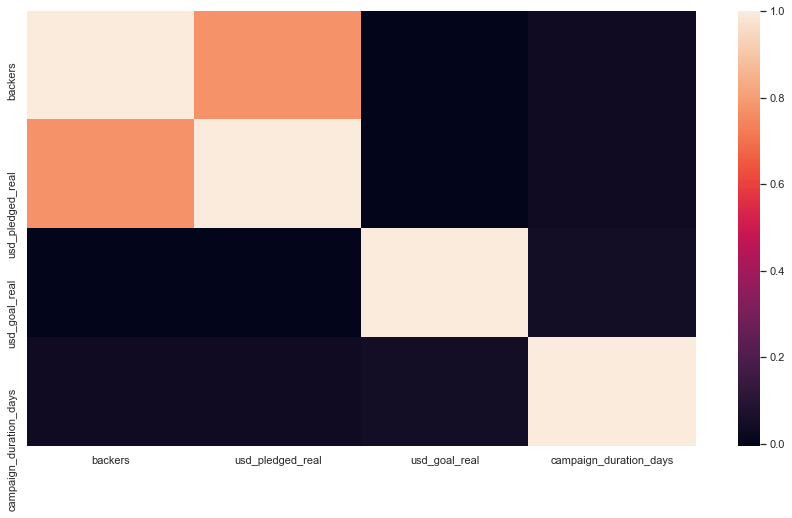

In [33]:
# Plot correlations as heatmap
sns.heatmap(cormat)

## Using Ordinal Encoding and NLP Features

### Prepare DataFrame with Feature Columns

In [179]:
# Make a copy of df1
df5 = df1.copy()

In [180]:
# Change 'failed' values to 0 and 'successful' values to 1
df5['state'] = df5['state'].map(convert_state)

In [181]:
df5.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,2016-01-01,6000,2015-12-07 18:21:00,100.0,0,2,CA,74.84,70.89,4253.51,24
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,2016-01-01,2000,2015-12-11 10:52:00,2102.0,1,48,BE,2314.01,2282.97,2172.19,20
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,2016-01-01,5000,2015-11-09 20:12:00,5630.0,1,116,US,5630.00,5630.00,5000.00,52


In [182]:
# Function to create a dict for a column in a dataframe where the keys are unique values and values are unique numbers
def make_column_dict(df, column_name: str) -> dict:
    unique_ids = {}
    unique_values = list(df[column_name].unique())
    for u_value in unique_values:
        unique_ids.setdefault(u_value, len(unique_ids))
    return unique_ids

In [183]:
# Make dictionaries for the columns: 'category', 'main_category', 'currency', 'country'
category_ids = make_column_dict(df5, 'category')
main_category_ids = make_column_dict(df5, 'main_category')
currency_ids = make_column_dict(df5, 'currency')
country_ids = make_column_dict(df5, 'country')

In [184]:
# Functions for mapping column values to ids using their corresponding dict

def convert_category(s: str) -> str:
    return category_ids[s]

def convert_main_category(s: str) -> str:
    return main_category_ids[s]

def convert_currency(s: str) -> str:
    return currency_ids[s]

def convert_country(s: str) -> str:
    return country_ids[s]

In [186]:
# Map each column value to its corresponding id
df5['category'] = df5['category'].map(convert_category)
df5['main_category'] = df5['main_category'].map(convert_main_category)
df5['currency'] = df5['currency'].map(convert_currency)
df5['country'] = df5['country'].map(convert_country)

In [191]:
# Print a sample of 3 elements from the dataframe
df5.sample(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
25068,331897953,Ladies First A Cappella EP,55,1,2,2016-05-29,5500,2016-04-29 18:17:00,5620.0,1,0,18,NaN,5620.0,5500.0,29
27817,583949017,Neela Goes to San Francisco,2,2,2,2016-06-13,3000,2016-05-14 16:56:00,4720.0,1,112,2,4720.0,4720.0,3000.0,29
47610,835326268,Hibernation: strategic deck building card game...,23,7,2,2016-10-24,9500,2016-09-09 00:03:00,1550.0,0,47,2,366.0,1550.0,9500.0,44


## Feature Engineering

Task: Create 3 features from the titles.

### Basic Features

In [193]:
# Functions for creating basic features of Kickstarter 'name'

def count_chars(name: str) -> int:
    """Counts the number of characters in a string.
    Args:
        name (str): A string representing the name of a Kickstarter
    Returns:
        int: Number of characters in the Kickstarter name
    """
    return len(name)

def count_caps(name: str) -> int:
    """Counts the number of capital characters in a string.
    Args:
        name (str): A string representing the name of a Kickstarter
    Returns:
        int: Number of capital characters in the Kickstarter name
    """
    count = 0
    for char in name:
        if char.isupper() == True:
            count += 1
    return count

def caps_fraction(name: str) -> float:
    """Calculates the fraction of capital characters in a string.
    Args:
        name (str): A string representing the name of a Kickstarter
    Returns:
        float: Fraction of capital characters over total characters in the Kickstarter name
    """
    total_chars = count_chars(name)
    num_caps_chars = count_caps(name)
    return num_caps_chars / total_chars

def count_punctuations(name: str) -> int:
    """Counts the number of punctuation characters in a string.
    Args:
        name (str): A string representing the name of a Kickstarter
    Returns:
        int: Number of punctuations in the Kickstarter name
    """
    global punctuation
    count = 0
    for char in name:
        if char in punctuation:
            count += 1
    return count

def punct_fraction(name: str) -> float:
    """Calculates the fraction of punctuation characters in a string.
    Args:
        name (str): A string representing the name of a Kickstarter
    Returns:
        float: Fraction of punctuations over total characters in the Kickstarter name
    """
    total_chars = count_chars(name)
    num_puncts = count_punctuations(name)
    return num_puncts / total_chars

In [194]:
# Calculate and add the selected features for each Kickstarter 'name' in the dataframe

# Add a new column, 'num_characters', to the dataframe at index 2 and count the number of characters in each Kickstarter 'name'
df5['num_characters'] = df5['name'].map(count_chars)
df5.insert(2, 'num_characters', df5.pop('num_characters'))

# Add a new column, 'caps_fraction', to the dataframe at index 3 and calculate the fraction of capital characters in each Kickstarter 'name'
df5['caps_fraction'] = df5['name'].map(caps_fraction)
df5.insert(3, 'caps_fraction', df5.pop('caps_fraction'))

# Add a new column, 'punctuations_fraction', to the dataframe at index 4 and calculate the fraction of puctuations in each Kickstarter 'name'
df5['punctuations_fraction'] = df5['name'].map(punct_fraction)
df5.insert(4, 'punctuations_fraction', df5.pop('punctuations_fraction'))

# Print a sample of 3 elements from the dataframe
df5.sample(3)

,ID,name,num_characters,caps_fraction,punctuations_fraction,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
76602,1465028280,Meal Prep * Nutrition* Martial Artist Lovers t...,57,0.105263,0.052632,68,4,2,2017-05-11,3000,2017-04-11 18:04:00,1.0,0,1,2,0.0,1.0,3000.0,29
31233,878793435,The Doggie Stile Tangle Resistant Pet Tie-Out ...,52,0.173077,0.019231,22,9,2,2016-07-03,10000,2016-06-03 00:58:00,438.0,0,7,2,438.0,438.0,10000.0,29
9280,1103908230,Fancy Pants Chance Likes to Dance Board Book,44,0.159091,0.000000,59,13,2,2016-03-03,9025,2016-02-02 17:14:00,546.0,0,18,2,546.0,546.0,9025.0,29


### Named Entity Recognition (NER) using SpaCy

In [195]:
NER = spacy.load("en_core_web_sm")

# Functions for labeling named entities in a Kickstarter's 'name'

def get_NER(df):
    NER_outputs = []
    for i, row in df.iterrows():
        name_NER = NER(row['name'])
        NER_outputs.append(name_NER)
    return NER_outputs

def make_NER_columns(df):
    named_entity_types = NER.get_pipe("ner").labels
    for NER_name in reversed(named_entity_types):
        df.insert(5, NER_name, 0)
    return

def assign_NER_counts(df, NER_output_list):
    NER_i = 0
    for i, row in df.iterrows():
        if len(NER_output_list[NER_i].ents) == 0:
            pass
        else:
            for word in NER_output_list[NER_i].ents:
                #df.at[i, word.label_] = df.iloc[i][word.label_] + 1
                #df.at[i, word.label_] = 1
                df.loc[i, word.label_] += 1
        NER_i += 1
    return

In [197]:
# Create columns for each type of named entity at column index 2 and initialize the values to 0
make_NER_columns(df5)

In [198]:
# Print the first 3 elements of the dataframe
df5.head(3)

,ID,name,num_characters,caps_fraction,punctuations_fraction,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,58,0.051724,0.051724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,6000,2015-12-07 18:21:00,100.0,0,2,0,74.84,70.89,4253.51,24
1,1019043170,Handcrafted leather wallet | key holder | card...,53,0.018868,0.037736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-01-01,2000,2015-12-11 10:52:00,2102.0,1,48,1,2314.01,2282.97,2172.19,20
2,1036288991,The Liaisons: a new twist on the old standards,47,0.042553,0.021277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2016-01-01,5000,2015-11-09 20:12:00,5630.0,1,116,2,5630.00,5630.00,5000.00,52


In [200]:
# Get the NER labels for each Kickstarter 'name'
NER_output_list = get_NER(df5)

#### Examples of Labeled Entities in Kickstarter Titles

In [203]:
# NER Example 1
NER_ex1 = NER_output_list[15]
displacy.render(NER_ex1, style="ent", jupyter=True)

In [204]:
# NER Example 2
NER_ex2 = NER_output_list[45]
displacy.render(NER_ex2, style="ent", jupyter=True)

In [205]:
# NER Example 3
NER_ex3 = NER_output_list[1000]
displacy.render(NER_ex3, style="ent", jupyter=True)

In [206]:
# NER Example 4
NER_ex4 = NER_output_list[5000]
displacy.render(NER_ex4, style="ent", jupyter=True)

In [207]:
# Count the occurrences of each named entity in a Kickstarter's name and indicate the count in the corresponding column
assign_NER_counts(df5, NER_output_list)

In [209]:
# Print the DataFrame's dimensions
print("DataFrame Dimensions: {} Rows, {} Columns".format(*df5.shape))

# Print the first 3 elements of the dataframe
df5.head(3)

DataFrame Dimensions: 96327 Rows, 37 Columns


,ID,name,num_characters,caps_fraction,punctuations_fraction,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,58,0.051724,0.051724,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2016-01-01,6000,2015-12-07 18:21:00,100.0,0,2,0,74.84,70.89,4253.51,24
1,1019043170,Handcrafted leather wallet | key holder | card...,53,0.018868,0.037736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016-01-01,2000,2015-12-11 10:52:00,2102.0,1,48,1,2314.01,2282.97,2172.19,20
2,1036288991,The Liaisons: a new twist on the old standards,47,0.042553,0.021277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2016-01-01,5000,2015-11-09 20:12:00,5630.0,1,116,2,5630.00,5630.00,5000.00,52


### Text Cleaning & Pre-Processing

In [210]:
# Functions for text pre-processing

def convert_utf8(s):
    return str(s)

def remove_urls(s):
    s = re.sub(r"[^\s]*www.[^\s]*", "", str(s))
    s = re.sub(r"[^\s]*.biz[^\s]", "", str(s))
    s = re.sub(r"[^\s]*.co.uk[^\s]", "", str(s))
    s = re.sub(r"[^\s]*.com[^\s]", "", str(s))
    s = re.sub(r"[^\s]*.edu[^\s]", "", str(s))
    s = re.sub(r"[^\s]*.gov[^\s]", "", str(s))
    s = re.sub(r"[^\s]*.info[^\s]", "", str(s))
    s = re.sub(r"[^\s]*.net[^\s]", "", str(s))
    s = re.sub(r"[^\s]*.org[^\s]", "", str(s))
    return s

def remove_mentions(s):
    s = re.sub(r"\@\b\w*\s", "", s)
    return s

def remove_numbers(s):
    return re.sub(r"[^\s]*[0-9]+[^\s]*", "", str(s))

def remove_punctuation(s):
    global punctuation
    for p in punctuation + "’":
        s = str(s).replace(p, " ")
    return s

# Using nltk's English stopwords
def remove_stopwords(s):
    global stopwords
    s = word_tokenize(s)
    s = " ".join([w for w in s if w not in stopwords.words('english')])
    return s

def penn2morphy(penntag, returnNone=False):
    morphy_tag = {'NN':wn.NOUN, 'JJ':wn.ADJ,
                  'VB':wn.VERB, 'RB':wn.ADV}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return None if returnNone else ''

def lemmatize(s):
    lemmas = []
    tokens = word_tokenize(s)
    tagged_tokens = nltk.pos_tag(tokens)
    for pair in tagged_tokens:
        new_pos = penn2morphy(pair[1])
        if new_pos != "":
            lemma = WordNetLemmatizer().lemmatize(pair[0], pos=new_pos)
        else:
            lemma = WordNetLemmatizer().lemmatize(pair[0])
        lemmas.append(lemma)
    s = " ".join(lemmas)
    return s

In [211]:
# Text Pre-Processing: Character removal & conversion

# Add a new column, 'name_processed', to the dataframe by first converting each Kickstarter's 'name' to type string
df5['name_processed'] = df5['name'].map(convert_utf8)
df5.insert(2, 'name_processed', df5.pop('name_processed'))

# Convert all characters in each Kickstarter's processed name to lowercase
df5['name_processed'] = df5['name_processed'].map(lambda x: x.lower())

# Remove URLs from each Kickstarter's processed name
df5['name_processed'] = df5['name_processed'].map(remove_urls)

# Remove mentions from each Kickstarter's processed name
df5['name_processed'] = df5['name_processed'].map(remove_mentions)

# Remove numbers from each Kickstarter's processed name
df5['name_processed'] = df5['name_processed'].map(remove_numbers)

# Remove punctuations from each Kickstarter's processed name
df5['name_processed'] = df5['name_processed'].map(remove_punctuation)

In [212]:
# Text Pre-Processing: Removing stopwords

# Remove stopwords from each Kickstarter's processed name
# 'remove_stopwords' is a custom function that takes in a string,
#      tokenizes it, and removes any stopwords in the string that
#      are in nltk's list of English stopwords.
df5['name_processed'] = df5['name_processed'].map(remove_stopwords)

In [213]:
# Lemmatize each word in each Kickstarter's processed name
df5['name_processed'] = df5['name_processed'].map(lemmatize)

In [214]:
# Print the dataframe's dimensions
print("DataFrame Dimensions (with empty rows): {} Rows, {} Columns".format(*df5.shape))

# Print a sample of 3 elements from the dataframe
df5.sample(3)

DataFrame Dimensions (with empty rows): 96327 Rows, 38 Columns


,ID,name,name_processed,num_characters,caps_fraction,punctuations_fraction,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
46016,52842045,"""Sir Clumsalot"" Children's Book",sir clumsalot child book,31,0.129032,0.096774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2016-10-13,4500,2016-08-29 18:40:00,500.0,0,16,2,0.0,500.00,4500.00,44
61072,1190688864,Warm Quilts to Share,warm quilt share,20,0.150000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,11,2,2017-01-28,400,2016-12-29 22:23:00,460.0,1,22,2,98.0,460.00,400.00,29
51160,1270458613,Epirus: Tennis bags as stylish as the sport it...,epirus tennis bag stylish sport,50,0.040000,0.020000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22,9,3,2016-11-17,20000,2016-10-18 09:30:00,21005.0,1,96,3,11164.3,25895.01,24656.05,29


### Latent Dirichlet Allocation (LDA)

In [215]:
# Create separate dataframe for LDA
df_lda = df5[['ID', 'name_processed']].copy()

In [216]:
# Make a corpus called text_data (type: list of string)
text_data = df_lda['name_processed'].tolist()

# Convert text_data (type: list of string) to a list of lists of strings
text_data = [str(text).split() for text in text_data]

In [217]:
# Bag-of-Words

# Create a gensim corpora dictionary from text_data
dictionary = corpora.Dictionary(text_data)

# Create a bag-of-words corpus of text_data using the dictionary
corpus = [dictionary.doc2bow(text) for text in text_data]

# Save the dictionary to the current working directory
dictionary.save("dictionary.gensim")

In [218]:
# LDA Model

# Define k topics for LDA using the number of unique values under 'main_category' (15)
lda_k = 15

# Make the LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=lda_k, id2word=dictionary, passes = 15)

# Save the LDA model to the current working directory
ldamodel.save("LDAmodel" + str(lda_k) + ".gensim")

In [219]:
# Examine topics

def print_LDA_topics_with_words(ldamodel, num_words):
    topics = ldamodel.print_topics(lda_k, num_words)
    for topic in topics:
        print("Topic #" + str(topic[0] + 1))
        words = topic[1].split(" + ")
        print("Words in Topic:")
        w_counter = 1
        for word in words:
            print("\tWord #{}: {}".format(w_counter, word))
            w_counter += 1
        print()
    return

# View the top 10 words in each topic in the LDA model
print_LDA_topics_with_words(ldamodel, 10)

Topic #1
Words in Topic:
	Word #1: 0.083*"make"
	Word #2: 0.080*"project"
	Word #3: 0.041*"design"
	Word #4: 0.029*"kid"
	Word #5: 0.028*"help"
	Word #6: 0.025*"create"
	Word #7: 0.023*"ultimate"
	Word #8: 0.022*"time"
	Word #9: 0.020*"u"
	Word #10: 0.018*"luxury"

Topic #2
Words in Topic:
	Word #1: 0.038*"shirt"
	Word #2: 0.026*"free"
	Word #3: 0.023*"back"
	Word #4: 0.020*"house"
	Word #5: 0.020*"change"
	Word #6: 0.017*"journey"
	Word #7: 0.016*"next"
	Word #8: 0.015*"run"
	Word #9: 0.012*"thing"
	Word #10: 0.012*"healthy"

Topic #3
Words in Topic:
	Word #1: 0.096*"film"
	Word #2: 0.058*"short"
	Word #3: 0.037*"love"
	Word #4: 0.030*"la"
	Word #5: 0.028*"travel"
	Word #6: 0.023*"show"
	Word #7: 0.021*"dog"
	Word #8: 0.018*"horror"
	Word #9: 0.018*"great"
	Word #10: 0.017*"feature"

Topic #4
Words in Topic:
	Word #1: 0.068*"de"
	Word #2: 0.022*"unity"
	Word #3: 0.021*"bottle"
	Word #4: 0.020*"two"
	Word #5: 0.020*"tale"
	Word #6: 0.020*"monster"
	Word #7: 0.019*"digital"
	Word #8: 0.

In [220]:
# LDA Visualization
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics = False)
pyLDAvis.display(lda_display)

In [221]:
# Save the LDA visualization to an HTML file
pyLDAvis.save_html(lda_display, "Kickstarter_LDA_display_" + str(lda_k) +  "Topics.html")

In [222]:
# Examine the LDA topic distribution scores

# Create a list for the topic distributions
topic_distn_lists = []

# For each document in the corpus,
for doc in corpus:
    # get the LDA topic distribution vector,
    topic_distn_vector = ldamodel[doc]
    # and append the vector to topic_distn_lists
    topic_distn_lists.append(topic_distn_vector)

In [223]:
# Functions for parsing LDA Topic Distribution lists

def make_TopicProbLists(num_docs, num_topics):
    init_list = [0 for x in range(0, num_docs)]
    topic_lists = [copy.deepcopy(init_list) for x in range(0, num_topics)]
    return topic_lists

def parse_TD_list(topic_lists, doc_counter, TD_list):
    for topic_prob_pair in TD_list:
        topic_num = topic_prob_pair[0]
        probability = topic_prob_pair[1]
        topic_lists[topic_num][doc_counter] = probability
    return topic_lists
        
def parse_TopicDistnLists(TD_lists, topic_lists):
    doc_counter = 0
    for TD_list in TD_lists:
        topic_lists = parse_TD_list(topic_lists, doc_counter, TD_list)
        doc_counter += 1
    return topic_lists

In [225]:
# Initialize the topic probability lists
topic_lists = make_TopicProbLists(len(topic_distn_lists), lda_k)

# Parse each topic distribution list to update the values in topic_lists
topic_lists = parse_TopicDistnLists(topic_distn_lists, topic_lists)

In [226]:
# For each LDA topic,
for i in reversed(range(lda_k)):
    # create a column name for the topic,
    col_name = "Topic_{}".format(i + 1)
    # and create a column at index 2 in the dataframe to represent each Kickstarter name's score for the topic 
    df_lda.insert(2, col_name, topic_lists[i])

In [227]:
# Print a sample of 3 elements from the dataframe
df_lda.sample(3)

,ID,name_processed,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15
53368,1287371551,connection film,0.355498,0.022224,0.355587,0.022224,0.022224,0.022224,0.022224,0.022224,0.022224,0.022224,0.022224,0.022224,0.022224,0.022224,0.022224
67310,1302505626,pubbing,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
69081,1936609685,greeting solar system,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.355550,0.022222,0.022222,0.022222,0.022222,0.355561,0.022222,0.022222,0.022222


In [228]:
# Export dataframe containing each Kickstarter title's LDA topic distribution scores
df_lda.to_csv(("Kickstarter_LDA_topic_distributions.csv"), index=None, header=True, encoding='utf-8')

In [230]:
# Also add the LDA topic distribution scores to the original dataframe

# For each LDA topic,
for i in reversed(range(lda_k)):
    # create a column name
    col_name = "Topic_{}".format(i + 1)
    # and create a column at index 24 in the dataframe to represent each Kickstarter name's score for the topic 
    df5.insert(24, col_name, topic_lists[i])

In [231]:
# Print the first 3 elements of the dataframe
df5.head(3)

,ID,name,name_processed,num_characters,caps_fraction,punctuations_fraction,CARDINAL,DATE,EVENT,FAC,GPE,LANGUAGE,LAW,LOC,MONEY,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_duration_days
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,organic tattoo remain day self use custom design,58,0.051724,0.051724,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.421536,0.000000,0.000000,0.118538,0.000000,0.118472,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.118547,0.000000,0.148811,0,0,0,2016-01-01,6000,2015-12-07 18:21:00,100.0,0,2,0,74.84,70.89,4253.51,24
1,1019043170,Handcrafted leather wallet | key holder | card...,handcraft leather wallet key holder card holder,53,0.018868,0.037736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.133322,0.000000,0.000000,0.000000,0.508346,0.000000,0.00000,0.133324,0.000000,0.133337,0.000000,0.000000,0.000000,0.000000,0,0,1,2016-01-01,2000,2015-12-11 10:52:00,2102.0,1,48,1,2314.01,2282.97,2172.19,20
2,1036288991,The Liaisons: a new twist on the old standards,liaison new twist old standard,47,0.042553,0.021277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.213327,0.013334,0.013334,0.013334,0.013334,0.013334,0.013334,0.21335,0.013334,0.013334,0.013334,0.013334,0.013334,0.013334,0.413310,1,1,2,2016-01-01,5000,2015-11-09 20:12:00,5630.0,1,116,2,5630.00,5630.00,5000.00,52


In [232]:
# Export the combined dataframe with features
df5.to_csv("Kickstarter_data_df5.csv", index=None, header=True, encoding='utf-8')

### Running Models with Ordinal Encoding and NLP Features

In [233]:
# Shuffle dataframe
df5 = df5.sample(frac=1)

# Export the shuffled dataframe with features
df5.to_csv("Kickstarter_data_df5_shuffled.csv", index=None, header=True, encoding='utf-8')

In [234]:
# Divide the dataset into the training set and test set using a 80/20 split
train, test = train_test_split(df5, test_size=0.2)

# Print the dimensions of the training set
print("Training Set DataFrame Dimensions: {} Rows, {} Columns".format(*train.shape))

# Print the dimensions of the test set
print("Test Set DataFrame Dimensions: {} Rows, {} Columns".format(*test.shape))

# Export the training and test sets
train.to_csv("Kickstarter_data_df5_train.csv", index=None, header=True, encoding='utf-8')
test.to_csv("Kickstarter_data_df5_test.csv", index=None, header=True, encoding='utf-8')

Training Set DataFrame Dimensions: 77061 Rows, 53 Columns
Test Set DataFrame Dimensions: 19266 Rows, 53 Columns


In [252]:
# Create list of column names that are features to be used in the model
df5_column_names = df5.columns.tolist()
features_list_nlp = df5_column_names[3:42] + df5_column_names[47:49] + df5_column_names[52:]

print("{} Features / Columns:".format(len(features_list_b)))
for i, col_name in enumerate(features_list_nlp):
    print("\t{}. {}".format(i, col_name))

62 Features / Columns:
	0. num_characters
	1. caps_fraction
	2. punctuations_fraction
	3. CARDINAL
	4. DATE
	5. EVENT
	6. FAC
	7. GPE
	8. LANGUAGE
	9. LAW
	10. LOC
	11. MONEY
	12. NORP
	13. ORDINAL
	14. ORG
	15. PERCENT
	16. PERSON
	17. PRODUCT
	18. QUANTITY
	19. TIME
	20. WORK_OF_ART
	21. Topic_1
	22. Topic_2
	23. Topic_3
	24. Topic_4
	25. Topic_5
	26. Topic_6
	27. Topic_7
	28. Topic_8
	29. Topic_9
	30. Topic_10
	31. Topic_11
	32. Topic_12
	33. Topic_13
	34. Topic_14
	35. Topic_15
	36. category
	37. main_category
	38. currency
	39. backers
	40. country
	41. campaign_duration_days


In [253]:
# Divide the training and test sets into their respective feature inputs and outputs
X_train_nlp = train[features_list_nlp]
y_train_nlp = train[['state']]
X_test_nlp = test[features_list_nlp]
y_test_nlp = test[['state']]

In [254]:
# Export the divided training and test sets
X_train_nlp.to_csv("Kickstarter_data_X_train_nlp.csv", index=None, header=True, encoding='utf-8')
y_train_nlp.to_csv("Kickstarter_data_y_train_nlp.csv", index=None, header=True, encoding='utf-8')
X_test_nlp.to_csv("Kickstarter_data_X_test_nlp.csv", index=None, header=True, encoding='utf-8')
y_test_nlp.to_csv("Kickstarter_data_y_test_nlp.csv", index=None, header=True, encoding='utf-8')

### New Logistic Regression Model

In [259]:
# Create Logistic Regression model using the training set
logistic_regression_nlp = LogisticRegression(max_iter=10000).fit(X_train_nlp, y_train_nlp.values.ravel())

In [260]:
print("Training Set Accuracy: {}".format(metrics.accuracy_score(logistic_regression_nlp.predict(X_train_nlp), y_train_nlp)))
print("Test Set Accuracy: {}".format(metrics.accuracy_score(logistic_regression_nlp.predict(X_test_nlp), y_test_nlp)))

Training Set Accuracy: 0.8289017791100557
Test Set Accuracy: 0.830115228900654


In [261]:
print(metrics.classification_report(logistic_regression_nlp.predict(X_test_nlp), y_test_nlp))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     13480
           1       0.66      0.88      0.76      5786

    accuracy                           0.83     19266
   macro avg       0.80      0.85      0.81     19266
weighted avg       0.86      0.83      0.84     19266



In [262]:
# Run model on test set and get prediction values
y_pred_logistic_regression_nlp = logistic_regression_nlp.predict(X_test_nlp)

In [263]:
# Export the model's predictions on the test set
pd.DataFrame(y_pred_logistic_regression_nlp).to_csv("Kickstarter_data_y_pred_logistic_regression_nlp.csv", index=None, header=True, encoding='utf-8')

#### Cross Validation on New Logistic Regression Model

In [264]:
# Specify the K-Fold Cross Validation to be used with k = 5
cv = KFold(n_splits=5, random_state=None, shuffle=False)

# Use K-Fold Cross Validation on the Logistic Regression model
scores_logistic_regression_nlp = cross_val_score(logistic_regression_nlp, X_train_nlp, y_train_nlp, scoring='accuracy', cv=cv, n_jobs=-1)

In [266]:
# View accuracy score for each fold
for i, score in enumerate(scores_logistic_regression_nlp, 1):
    print("Fold {} Accuracy: {}".format(i, score))
    
print("Cross Validation Accuracy: ", mean(scores_logistic_regression_nlp), "+/-", std(scores_logistic_regression_nlp))

Fold 1 Accuracy: 0.8304677869331084
Fold 2 Accuracy: 0.8260446405398391
Fold 3 Accuracy: 0.8324682065922657
Fold 4 Accuracy: 0.823124837788736
Fold 5 Accuracy: 0.830716324941604
Cross Validation Accuracy:  0.8285643593591108 +/- 0.0034476482842733724


#### Confusion Matrix & ROC Curve for New Logistic Regression

In [267]:
# Create confusion matrix using true labels and model's predicted labels
cm_logistic_regression_nlp = confusion_matrix(y_test_nlp, y_pred_logistic_regression_nlp)

print("True Negatives:", cm_logistic_regression_nlp[0][0])
print("False Positives:", cm_logistic_regression_nlp[0][1])
print("False Negatives:", cm_logistic_regression_nlp[1][0])
print("True Positives:", cm_logistic_regression_nlp[1][1])

True Negatives: 10876
False Positives: 669
False Negatives: 2604
True Positives: 5117


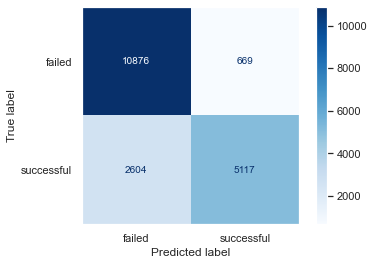

In [268]:
cmd_logistic_regression_nlp = ConfusionMatrixDisplay(cm_logistic_regression_nlp, display_labels=['failed', 'successful'])
cmd_logistic_regression_nlp.plot(cmap="Blues", values_format='d')
plt.grid(False)
plt.show()

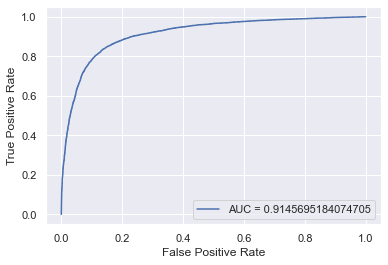

In [269]:
# Define metrics
y_pred_proba_logistic_regression_nlp = logistic_regression_nlp.predict_proba(X_test_nlp)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_nlp, y_pred_proba_logistic_regression_nlp)
auc_logistic_regression_nlp = metrics.roc_auc_score(y_test_nlp, y_pred_proba_logistic_regression_nlp)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = " + str(auc_logistic_regression_nlp))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

### New Random Forest Model

In [270]:
# Create Random Forest model using the training set
random_forest_nlp = RandomForestClassifier().fit(X_train_nlp, y_train_nlp.values.ravel())

In [271]:
print("Training Set Accuracy: {}".format(metrics.accuracy_score(random_forest_nlp.predict(X_train_nlp), y_train_nlp)))
print("Test Set Accuracy: {}".format(metrics.accuracy_score(random_forest_nlp.predict(X_test_nlp), y_test_nlp)))

Training Set Accuracy: 0.9999870232672817
Test Set Accuracy: 0.8756358351500052


In [272]:
print(metrics.classification_report(random_forest_nlp.predict(X_test_nlp), y_test_nlp))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11283
           1       0.86      0.83      0.85      7983

    accuracy                           0.88     19266
   macro avg       0.87      0.87      0.87     19266
weighted avg       0.88      0.88      0.88     19266



In [273]:
# Run model on test set and get prediction values
y_pred_random_forest_nlp = random_forest_nlp.predict(X_test_nlp)

In [274]:
# Export the model's predictions on the test set
pd.DataFrame(y_pred_random_forest_nlp).to_csv("Kickstarter_data_y_pred_random_forest_nlp.csv", index=None, header=True, encoding='utf-8')

#### Cross Validation on New Random Forest Model

In [276]:
# Specify the K-Fold Cross Validation to be used with k = 5
cv = KFold(n_splits=5, random_state=None, shuffle=False)

# Use K-Fold Cross Validation on the Random Forest model
scores_random_forest_nlp = cross_val_score(random_forest_nlp, X_train_nlp, y_train_nlp, scoring='accuracy', cv=cv, n_jobs=-1)

In [277]:
# View accuracy score for each fold
for i, score in enumerate(scores_random_forest_nlp, 1):
    print("Fold {} Accuracy: {}".format(i, score))
    
print("Cross Validation Accuracy: ", mean(scores_random_forest_nlp), "+/-", std(scores_random_forest_nlp))

Fold 1 Accuracy: 0.8743268669305132
Fold 2 Accuracy: 0.873021022579808
Fold 3 Accuracy: 0.8717233324682065
Fold 4 Accuracy: 0.8659486114715805
Fold 5 Accuracy: 0.8716584479626265
Cross Validation Accuracy:  0.8713356562825469 +/- 0.0028657473644920738


#### Confusion Matrix & ROC Curve for New Random Forest Model

In [278]:
# Create confusion matrix using true labels and model's predicted labels
cm_random_forest_nlp = confusion_matrix(y_test_nlp, y_pred_random_forest_nlp)

print("True Negatives:", cm_random_forest_nlp[0][0])
print("False Positives:", cm_random_forest_nlp[0][1])
print("False Negatives:", cm_random_forest_nlp[1][0])
print("True Positives:", cm_random_forest_nlp[1][1])

True Negatives: 10216
False Positives: 1329
False Negatives: 1067
True Positives: 6654


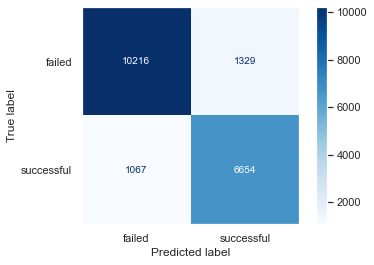

In [279]:
# Plot confusion matrix
cmd_random_forest_nlp = ConfusionMatrixDisplay(cm_random_forest_nlp, display_labels=['failed', 'successful'])
cmd_random_forest_nlp.plot(cmap="Blues", values_format='d')
plt.grid(False)
plt.show()

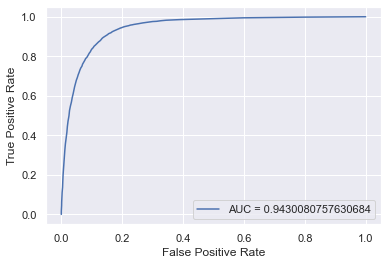

In [280]:
# Define metrics
y_pred_proba_random_forest_nlp = random_forest_nlp.predict_proba(X_test_nlp)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_nlp, y_pred_proba_random_forest_nlp)
auc_random_forest_nlp = metrics.roc_auc_score(y_test_nlp, y_pred_proba_random_forest_nlp)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = " + str(auc_random_forest_nlp))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()